In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [2]:
trainset = torchvision.datasets.FashionMNIST(
                    root='../chap08/data/', 
                    train=True, download=True, 
                    transform=transforms.ToTensor())

In [3]:
print(type(trainset))

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [4]:
batch_size = 4
trainloader = torch.utils.data.DataLoader(
                    trainset, batch_size=batch_size, shuffle=True)

In [10]:
dataiter = iter(trainloader)
# images, labels = dataiter.next()
# AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'
images, labels = next(dataiter)

print(images.shape)
print(images[0].shape)
print(images[0][0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
6


In [11]:
def imshow(img, title):
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [13]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

    return images, labels

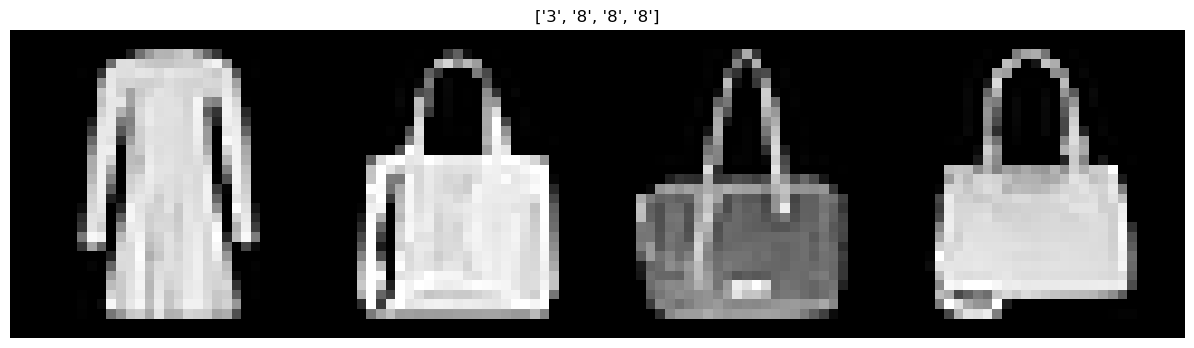

In [14]:
images, labels = show_batch_images(trainloader)

In [15]:
classes = {
    0: "T-Shirt/Top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Angle Boot"
}

In [ ]:
class NormalNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48),
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.ReLU(),
            nn.Linear(24, 10)
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x